## Hydrogen Atom
#### Thermal radiation at temperature T

In [5]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### (a) At room temperature, T = 300K, what is the probability of finding the atom in the first excited state (n=2)?

We can refer to our quantum notes to get the energy levels of hydrogen: $E_{n} = \frac{-me^4}{2n^2\hbar}$. The multiplicity of the energy levels scale as $n^2$. Then we get the expression for probability:  $$P(n=2) = \frac{2^2e^{\frac{-E_2}{k_{b}T}}}{\sum_{n}^{\infty}n^{2}e^{\frac{-E_n}{k_{b}T}}}$$
Limiting our consideration to the first 10 energy levels, we get instead: $$P(n=2) = \frac{2^2e^{\frac{-E_2}{k_{b}T}}}{\sum_{n}^{10}n^{2}e^{\frac{-E_n}{k_{b}T}}}$$ Now we can calculate this probability:

In [114]:
# first we can define our constants
m = 9.1093837e-31 # kg
hbar = 1.05457182e-34 # Js
kb = 1.3806452e-23 # J/K
charge =1.60217663e-19 # C
T = 300 # K 
num_e = 10
n=2
eps_0 = 8.854187817e-12 # permittivity of charge

# we can define our list of energies to represent energy levels
eps = [(-m*charge**4)/(2*(n*hbar*4*np.pi*eps_0)**2) for n in range(num_e + 1)[1:]]
eps[:10]

[-2.179872327158994e-18,
 -5.449680817897485e-19,
 -2.422080363509993e-19,
 -1.3624202044743712e-19,
 -8.719489308635977e-20,
 -6.055200908774982e-20,
 -4.448719035018355e-20,
 -3.406050511185928e-20,
 -2.6912004038999935e-20,
 -2.1798723271589943e-20]

In [115]:
# now we can calculate P(n=2) based on energy levels we can create

def calc_prob(num_e, T, n):
    """ Gives the probability a H atom will be in a energy level n when coupled to a reservoir
        inputs: num_e - number of total energy levels
                T - temperature of the reservoir
                n - the energy level of interest
        returns: float P_n - probability n is the H atom state
    """
    energy_n = n**2*(exp(-eps[n-1]/(kb*T)))
    Z = sum([(i+1)**2*exp(-eps[i]/(kb*T)) for i in range(num_e)])
    P_n = energy_n/Z
    return P_n

p2 = calc_prob(10, 300,2)
print("The probability at T=300K with 10 energy levels:", p2)

The probability at T=300K with 10 energy levels: 1.504535188522937e-171


#### (b) If T=6000K, which is roughly the surface of temperature of the Sun, what is the probability that the atom will be found in the first excited state? 
We can repeat the same calculation as in part (a), but now we can tweak the temperature:

In [116]:
T2 = 6000
p2 = calc_prob(10, 6000, 2)
print("The probability at T=6000K with 10 energy levels:", p2)

The probability at T=6000K with 10 energy levels: 1.073561932078629e-08


#### (c) At what temperature is the probability of finding the atom in a state at n = 2 the same as finding it in any of the other states with n between 3 and 6 inclusive?
We can iterate through possible temperatures and calculate the probabilites at n = 2, and 3 $\leq n \leq 6$.

In [126]:
T_x = 0
P2L = []
P36L = []
delta = 0

for t in range(5000,15000):
    P_2 = calc_prob(10, t, 2)
    P_36 = calc_prob(10,t,3) + calc_prob(10,t,4) + calc_prob(10,t,5) + calc_prob(10,t,6)
    
    P2L += [P_2]
    P36L += [P_36]
    delta = 1e-9
    if P_2 < P_36 + delta and P_2 > P_36 - delta:
        T_x = t

print("The temperature at which the probabilities are the same is", T_x, "K")

The temperature at which the probabilities are the same is 10157 K


<AxesSubplot:xlabel='Temperature, K', ylabel='Probability'>

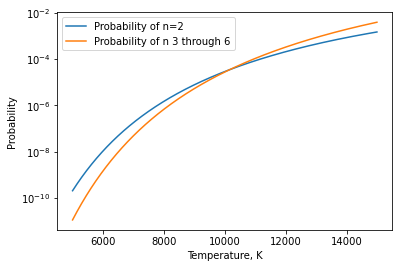

In [118]:
fig, ax = plt.subplots()
plt.yscale('log')
ax.plot(range(5000,15000), P2L, label="Probability of n=2")
ax.plot(range(5000,15000), P36L, label="Probability of n 3 through 6")
ax.set_xlabel("Temperature, K")
ax.set_ylabel("Probability")
ax.legend()
ax